In [2]:
import pandas as pd
data=pd.read_csv('/Users/rain/Desktop/data200b.csv')
Y=data.iloc[:,1].values
X=data.iloc[:,[0,3,4,5,6,7]]

## Examine the bivariate distributions of the variables (e.g., correlation matrix, scatterplots)

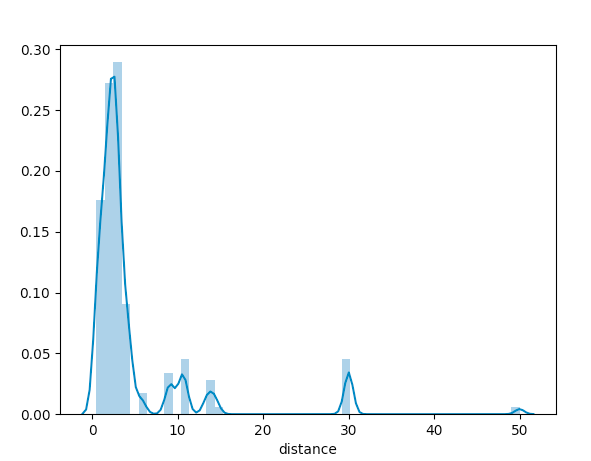

In [5]:
# distance
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(X['distance'])

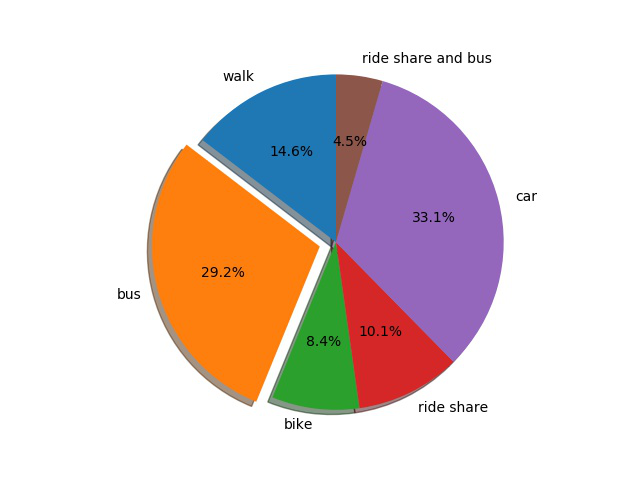

In [6]:
# transport
sizes=[len(X[X['Transport']=='walk']),len(X[X['Transport']=='bus']),len(X[X['Transport']=='bike']),
       len(X[X['Transport']=='ride share']), len(X[X['Transport']=='car']), len(X[X['Transport']=='ride share and bus'])]

labels = 'walk','bus','bike','ride share','car', 'ride share and bus'
explode = (0, 0.1,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

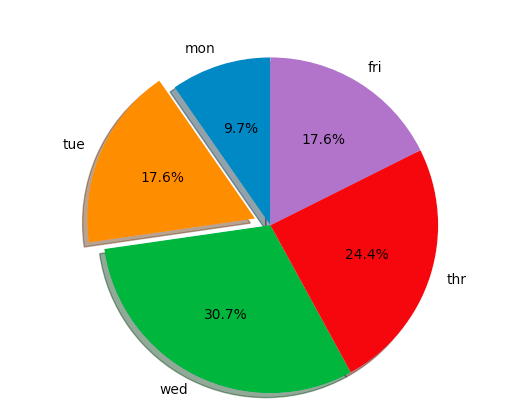

In [7]:
# weekday
sizes=[len(X[X['Day_of_week']=='mon']),len(X[X['Day_of_week']=='tue']),len(X[X['Day_of_week']=='wed']),len(X[X['Day_of_week']=='thr']),len(X[X['Day_of_week']=='fri'])]
labels= ['mon','tue','wed','thr','fri']
explode = (0, 0.1,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [9]:
# change departure time to datetime
# change departure time to datetime
from datetime import datetime
for i in range(len(X)):
    X.iloc[:, -1][i]=datetime.strptime(X.iloc[:, -1][i], "%H:%M")

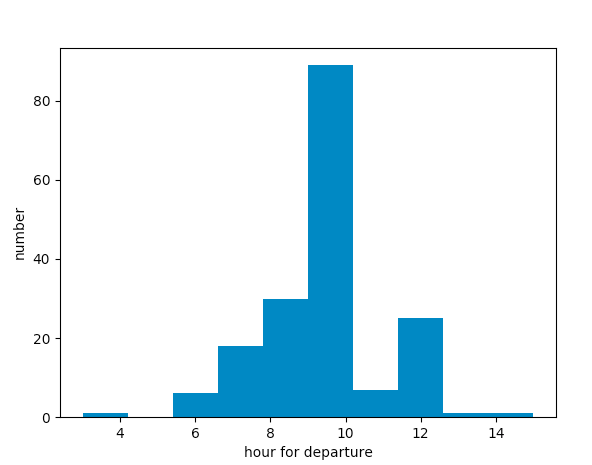

In [10]:
# plot hist for departuretime
time=X.iloc[:,-1].dt.hour
time.plot(kind='hist')
plt.ylabel('number')
plt.xlabel('hour for departure')
plt.show()

## Fit regression models

In [11]:
def SLR(i):
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    labelencoder_X = LabelEncoder()
    x = np.array(X.iloc[:, i])
    x = labelencoder_X.fit_transform(x)
    onehotencoder = OneHotEncoder(sparse=False)
    x = onehotencoder.fit_transform(x.reshape(-1, 1))
    x = np.delete(x, 0, axis=1)
    x = sm.add_constant(x)
    est = sm.OLS(Y, x)
    est2 = est.fit()
    return (est2.summary())

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
dis = np.array(X.iloc[:,0])
dis = sm.add_constant(dis)
est = sm.OLS(Y, dis)
est2 = est.fit()